# AutoEncoder para inicializar pesos de uma CNN


Antes de iniciar a execução do código faça a seguinte alteração: Menu: **Ambiente de execução -> Alterar o tipo de ambiente de execução -> GPU**

In [ ]:
import numpy as np
from PIL import Image

from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Reshape, UpSampling2D, Conv2DTranspose, Dense
from keras.models import load_model
from keras.datasets import cifar10
from keras.utils import to_categorical

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from numpy.random import seed
from tensorflow.random import set_seed

**Definição de parâmetros:**

In [ ]:
batchSize = 32
numberEpochs = 50

**Preparação dos dados:**






In [ ]:
print("Loading CIFAR10 images ...")
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

perm = np.random.permutation(Xtrain.shape[0])
XtrainSuper = Xtrain[perm[0 : 25000]]
XtrainUnsup = Xtrain[perm[25000 : 50000]]
Ytrain = Ytrain[perm[0 : 25000]]

YtrainCategorical = to_categorical(Ytrain)
YtestCategorical = to_categorical(Ytest)

print('\tTraining Supervised set shape: ', XtrainSuper.shape)
print('\tTraining Unsupervised set shape: ', XtrainUnsup.shape)
print('\tTesting set shape: ', Xtest.shape)

Loading CIFAR10 images ...
	Training Supervised set shape:  (25000, 32, 32, 3)
	Training Unsupervised set shape:  (25000, 32, 32, 3)
	Testing set shape:  (10000, 32, 32, 3)


**Treinando uma CNN com pesos aleatórios:**

Defining the CNN from scratch ...
Training the CNN ...
Epoch 1/50
782/782 [==============================] - 3s 3ms/step - loss: 2.1293 - accuracy: 0.3989
Epoch 2/50
782/782 [==============================] - 3s 3ms/step - loss: 1.3166 - accuracy: 0.5348
Epoch 3/50
782/782 [==============================] - 3s 3ms/step - loss: 1.1923 - accuracy: 0.5806
Epoch 4/50
782/782 [==============================] - 3s 3ms/step - loss: 1.1120 - accuracy: 0.6140
Epoch 5/50
782/782 [==============================] - 3s 3ms/step - loss: 1.0386 - accuracy: 0.6375
Epoch 6/50
782/782 [==============================] - 3s 3ms/step - loss: 0.9866 - accuracy: 0.6566
Epoch 7/50
782/782 [==============================] - 3s 3ms/step - loss: 0.9214 - accuracy: 0.6782
Epoch 8/50
782/782 [==============================] - 3s 3ms/step - loss: 0.8660 - accuracy: 0.7020
Epoch 9/50
782/782 [==============================] - 3s 3ms/step - loss: 0.7978 - accuracy: 0.7183
Epoch 10/50
782/782 [========================

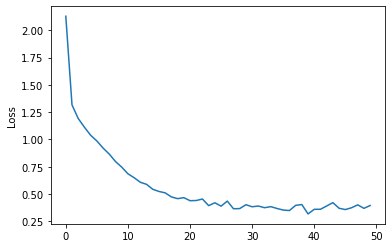

In [ ]:
print("Defining the CNN from scratch ...")
input_img = Input(shape=(32, 32, 3,))

cnnScratch = Conv2D(64, kernel_size=(3,3), strides=(2, 2), padding='same', activation='relu')(input_img)
cnnScratch = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(cnnScratch)
cnnScratch = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(cnnScratch)
cnnScratch = MaxPooling2D(pool_size=(2, 2))(cnnScratch)
cnnScratch = Flatten(name='code')(cnnScratch)
cnnScratch = Dense(10, activation='softmax', name='pred')(cnnScratch)

seed(1)
set_seed(2)

cnnScratch = Model(inputs=input_img, outputs=cnnScratch)
cnnScratch.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#cnnScratch.summary()

print("Training the CNN ...")
historyScratch = cnnScratch.fit(x=XtrainSuper, y=YtrainCategorical, batch_size=batchSize, epochs=numberEpochs, shuffle=True, verbose=1)

plt.plot(historyScratch.history['loss'])
plt.ylabel('Loss')
plt.show()

**Utilizando AutoEncoder para inicializar os pesos:**

Em alguns cenários poderemos ter dados rotulados e não rotulados simultaneamente. Uma alternativa muito interessante para não desperdiçar nenhuma imagem é construir um AutoEncoder e treiná-lo com as imagens não rotuladas. Em seguida, reutilizamos as camadas que compõem o Encoder como base para uma CNN adicionando camadas posteriores. Assim, ao invés de inicializarmos os pesos aleatoriamente, aproveitamos as amostras não rotuladas com este propósito.


1.   Treinamentos o AE com os exemplos não rotulados;
2.   Carregamos o AE pré-treinado, selecionamos o Encoder da rede e adicionamos as camadas desejadas;
1.   Definimos a função de perda e o algoritmo de otimização para o treinamento da CNN;
2.   Utilizamos a rede para predição ou para extração de características.

Defining the AE ...
Training the AE ...
Epoch 1/25
782/782 [==============================] - 3s 4ms/step - loss: 590.9249
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 170.5302
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 131.6716
Epoch 4/25
782/782 [==============================] - 3s 4ms/step - loss: 114.1641
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 102.0484
Epoch 6/25
782/782 [==============================] - 3s 4ms/step - loss: 91.8715
Epoch 7/25
782/782 [==============================] - 3s 4ms/step - loss: 86.5382
Epoch 8/25
782/782 [==============================] - 3s 4ms/step - loss: 79.9281
Epoch 9/25
782/782 [==============================] - 3s 4ms/step - loss: 78.3436
Epoch 10/25
782/782 [==============================] - 3s 4ms/step - loss: 73.1829
Epoch 11/25
782/782 [==============================] - 3s 4ms/step - loss: 69.5844
Epoch 12/25
782/782 [==============================

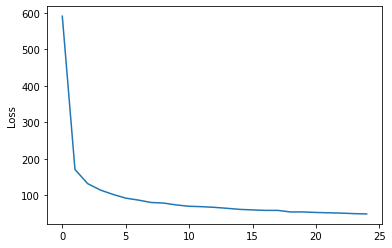

In [ ]:
print("Defining the AE ...")
input_img = Input(shape=(32, 32, 3,))

encoder = Conv2D(64, kernel_size=(3,3), strides=(2, 2), padding='same', activation='relu')(input_img)
encoder = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(encoder)
encoder = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(encoder)
encoder = MaxPooling2D(pool_size=(2, 2))(encoder)
encoder = Flatten(name='code')(encoder)

decoder = Reshape((8,8,64))(encoder)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2DTranspose(64, kernel_size=(3,3), padding='same', activation='relu')(decoder)
decoder = Conv2DTranspose(64, kernel_size=(3,3), padding='same', activation='relu')(decoder)
decoder = Conv2DTranspose(3, kernel_size=(3,3), strides=(2, 2), padding='same', activation='relu')(decoder)

seed(1)
set_seed(2)

autoencoder = Model(input_img, decoder)
autoencoder.compile(loss='mean_squared_error', optimizer='adam')
#autoencoder.summary()

print("Training the AE ...")
historyAE = autoencoder.fit(x=XtrainUnsup, y=XtrainUnsup, batch_size=batchSize, epochs=int(numberEpochs/2), shuffle=True, verbose=1)

plt.plot(historyAE.history['loss'])
plt.ylabel('Loss')
plt.show()

**A partir do Encoder fazemos fine-tuning na CNN:**




Loading the Encoder model
	Adding new layers to the model ...
	Set fine-tuning configuration...
Training the CNN ...
Epoch 1/25
782/782 [==============================] - 3s 3ms/step - loss: 2.8118 - accuracy: 0.2555
Epoch 2/25
782/782 [==============================] - 3s 3ms/step - loss: 1.6027 - accuracy: 0.4262
Epoch 3/25
782/782 [==============================] - 3s 3ms/step - loss: 1.4222 - accuracy: 0.4954
Epoch 4/25
782/782 [==============================] - 3s 3ms/step - loss: 1.2843 - accuracy: 0.5466
Epoch 5/25
782/782 [==============================] - 3s 3ms/step - loss: 1.1795 - accuracy: 0.5844
Epoch 6/25
782/782 [==============================] - 3s 3ms/step - loss: 1.0957 - accuracy: 0.6154
Epoch 7/25
782/782 [==============================] - 3s 3ms/step - loss: 1.0340 - accuracy: 0.6360
Epoch 8/25
782/782 [==============================] - 3s 3ms/step - loss: 0.9521 - accuracy: 0.6673
Epoch 9/25
782/782 [==============================] - 3s 3ms/step - loss: 0.8728 - 

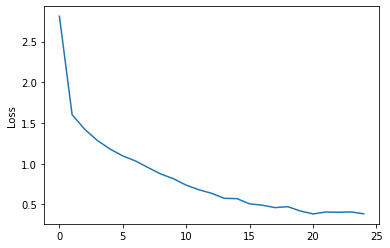

313/313 [==============================] - 1s 3ms/step - loss: 6.0218 - accuracy: 0.5345
CNN Scratch:  0.534500002861023
313/313 [==============================] - 1s 3ms/step - loss: 3.3428 - accuracy: 0.5462
CNN using AE:  0.5461999773979187


In [ ]:
print("Loading the Encoder model")
cnnEncoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(name='code').output)

print("\tAdding new layers to the model ...")
newTop = Sequential()
newTop.add(Dense(10, activation='softmax', name='pred', input_shape=cnnEncoder.output_shape[1:]))

seed(1)
set_seed(2)

print("\tSet fine-tuning configuration...")
cnnEncoder = Model(inputs=cnnEncoder.input, outputs=newTop(cnnEncoder.output))
cnnEncoder.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#cnnEncoder.summary()

print("Training the CNN ...")
historyEncoder = cnnEncoder.fit(x=XtrainSuper, y=YtrainCategorical, batch_size=batchSize, epochs=int(numberEpochs/2), shuffle=True, verbose=1)

plt.plot(historyEncoder.history['loss'])
plt.ylabel('Loss')
plt.show()

acc = cnnScratch.evaluate(x=Xtest, y=YtestCategorical, batch_size=batchSize)
print("CNN Scratch: ", acc[1])

acc = cnnEncoder.evaluate(x=Xtest, y=YtestCategorical, batch_size=batchSize)
print("CNN using AE: ", acc[1])

**Visualização do código gerado:**

Podemos verificar se a representação do conjunto de dados está bem separável por meio da geração de um gráfico. Neste exemplo, nosso autoencoder não convergiu propriamente (loss: 48.5814) pela quantidade pequena de épocas, consequentemente, as características ainda não são tão representativas para a separação adequada.

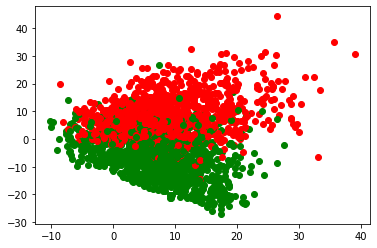

In [ ]:
model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(name='code').output)
prediction = np.array(model.predict(Xtest))
featuresTest = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))
featuresTest = PCA(n_components=2).fit_transform(featuresTest)

color = ["green", "red", "blue", "yellow", "gray", "orange", "pink", "brown", "purple", "black"]
for i in range (0, Ytest.shape[0]):
    if (Ytest[i][0] == 0 or Ytest[i][0] == 1):
      plt.scatter(featuresTest[i][0], featuresTest[i][1], c=color[Ytest[i][0]], marker='o')
plt.show()

**Resumo:**

Treinamento:
- CNN inicializado com pesos aleatórios: 50 épocas (loss: 0.3950 - accuracy: 0.9013)
- CNN inicializado com Encoder: (25+25) épocas (loss: 0.3848 - accuracy: 0.8771)

Teste:
- CNN inicializado com pesos aleatórios (accuracy: 0.5345)
- CNN inicializado com Encoder (accuracy: 0.5462)